In [1]:
#Importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,power_transform 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Libraries Imported

In [2]:
#importing Data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Dataset Imported

In [3]:
df.shape

(7752, 25)

From the above observation we can say that there are 7752 rows and 25 columns

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

All the columns present in the Dataset

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

As we can see all the features and target variables have continuous type of data,only the Date coluumn have object dtype , So we can say that it is a regression problem 

In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


from the above observation we can see that nearly every column have null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

As we can see except 4 columns all the columns have null values, We have to fill up the Nan's 

In [4]:
contdf = df.select_dtypes('float64')
contdf.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

All the columns with the continuous type of data 

In [5]:
catdf = df.select_dtypes('object')
catdf.columns

Index(['Date'], dtype='object')

The columns with the object data type

In [6]:
modevalue = df['Date'].mode()[0]
df['Date'].fillna(modevalue, inplace = True)

for i in contdf:
    meanvalue = df[i].mean()
    df[i].fillna(meanvalue, inplace = True)

Filling the null values 

Continuous data with the mean and object type data with the mode

In [7]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

After filling the Nan's we can see that the dataset have 0 null values

In [13]:
df.isna().any()

station             False
Date                False
Present_Tmax        False
Present_Tmin        False
LDAPS_RHmin         False
LDAPS_RHmax         False
LDAPS_Tmax_lapse    False
LDAPS_Tmin_lapse    False
LDAPS_WS            False
LDAPS_LH            False
LDAPS_CC1           False
LDAPS_CC2           False
LDAPS_CC3           False
LDAPS_CC4           False
LDAPS_PPT1          False
LDAPS_PPT2          False
LDAPS_PPT3          False
LDAPS_PPT4          False
lat                 False
lon                 False
DEM                 False
Slope               False
Solar radiation     False
Next_Tmax           False
Next_Tmin           False
dtype: bool

Not a single nan present in the dataset

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Day'] = df['Date'].apply(lambda x:x.day)
df['Year']  =df['Date'].apply(lambda x:x.year)

Seprating the Month , Day , Year from the Date column

In [9]:
df.drop('Date',axis = 1,inplace = True)

Dropped the Date column 

In [10]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013


After seprating the date column and droping the date column we can see change in the dataset , Now we have 27 columns

<AxesSubplot:xlabel='station', ylabel='Density'>

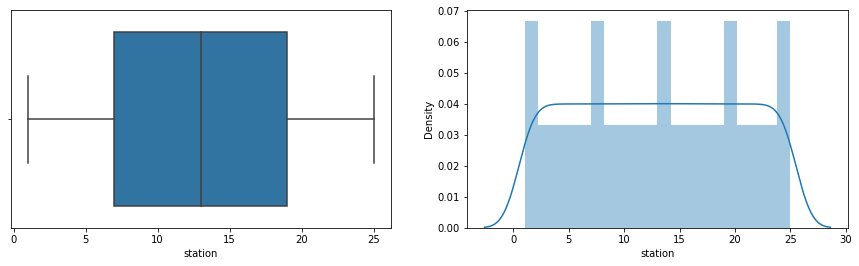

In [17]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['station'])
plt.subplot(1,2,2)
sns.distplot(df['station'])

From the above observation we can see that there is no outlier present in the column and skewness is also okay 

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

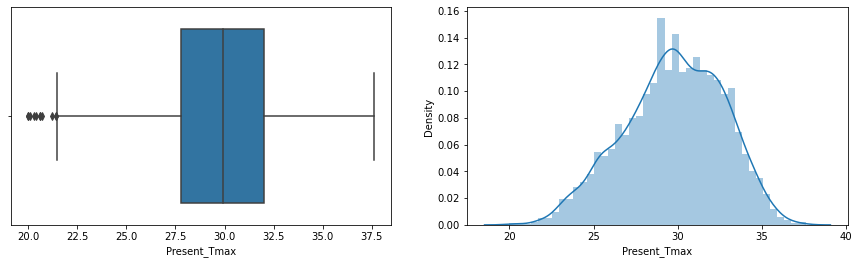

In [18]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Present_Tmax'])
plt.subplot(1,2,2)
sns.distplot(df['Present_Tmax'])

From the above observation we can see that there are outliers present in the column and data is negatively skewed

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

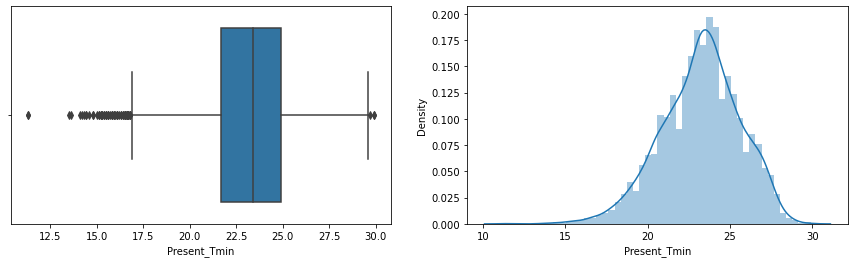

In [19]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Present_Tmin'])
plt.subplot(1,2,2)
sns.distplot(df['Present_Tmin'])

From the above observation we can see that there are outliers present in the column and data is negatively skewed

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

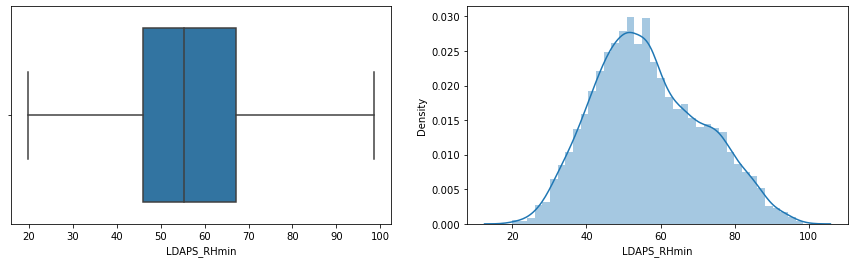

In [20]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_RHmin'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_RHmin'])

From the above observation we can see that there is no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

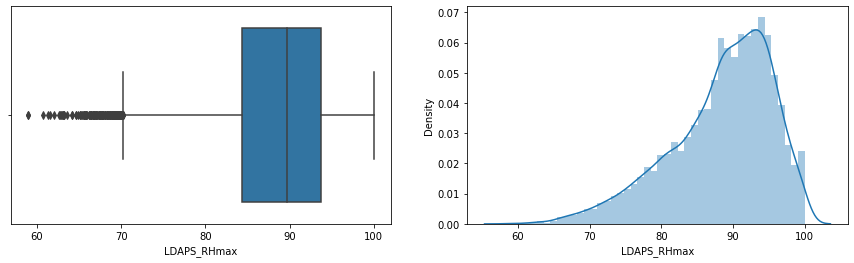

In [21]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_RHmax'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_RHmax'])

From the above observation we can see that there are outliers present in the column and data is negatively skewed

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

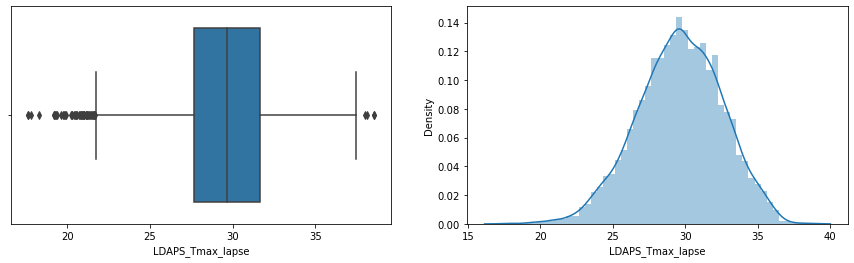

In [22]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_Tmax_lapse'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_Tmax_lapse'])

From the above observation we can see that there are outliers present in the column and data is skewed from both sides

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

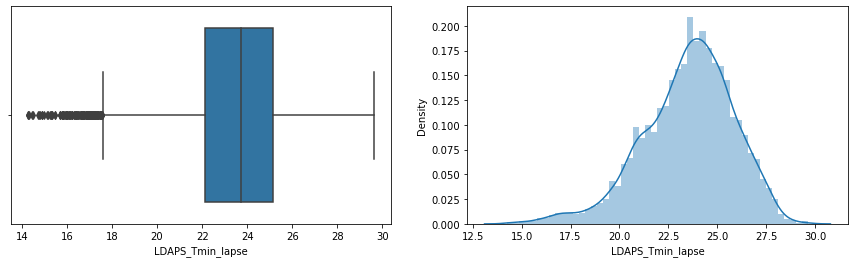

In [23]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_Tmin_lapse'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_Tmin_lapse'])

From the above observation we can see that there are outliers present in the column and data is negatively skewed

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

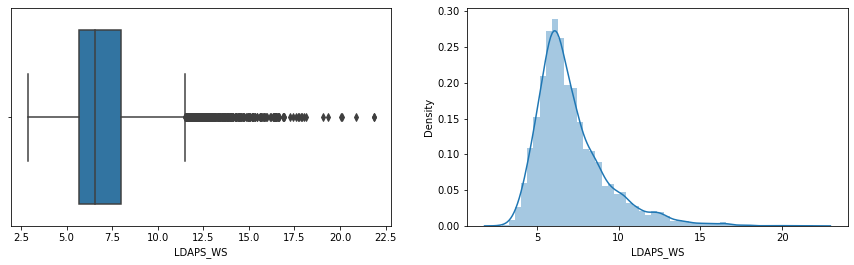

In [24]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_WS'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_WS'])

From the above observation we can see that there are outliers present in the column and data is positively skewed

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

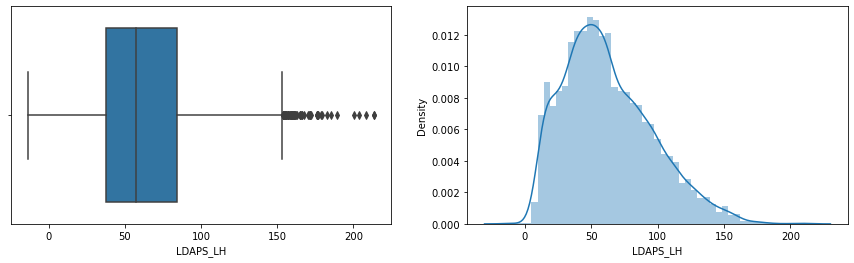

In [25]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_LH'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_LH'])

From the above observation we can see that there are outliers present in the column and data is positively skewed

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

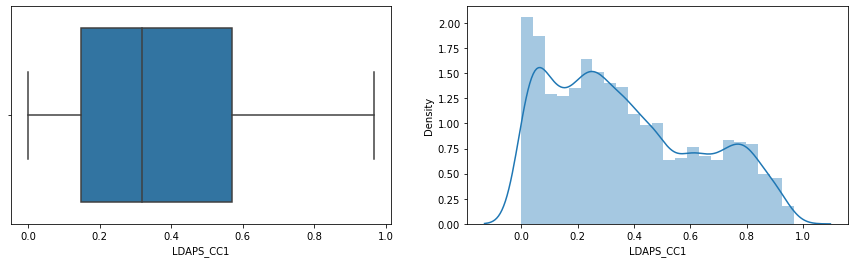

In [26]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_CC1'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_CC1'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

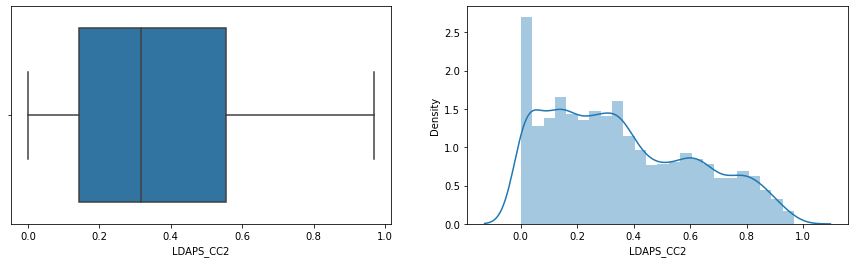

In [27]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_CC2'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_CC2'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

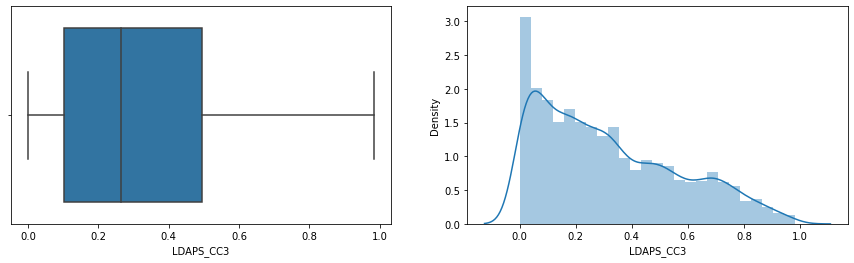

In [28]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_CC3'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_CC3'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

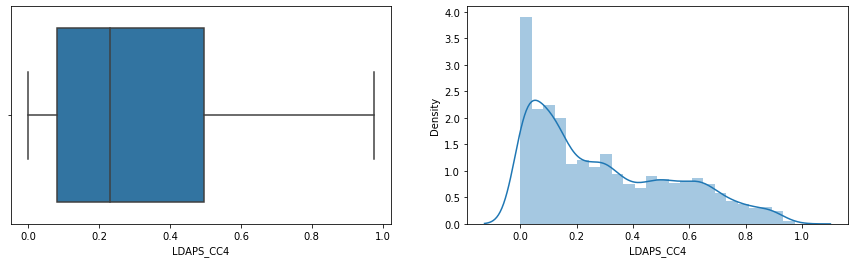

In [29]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_CC4'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_CC4'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

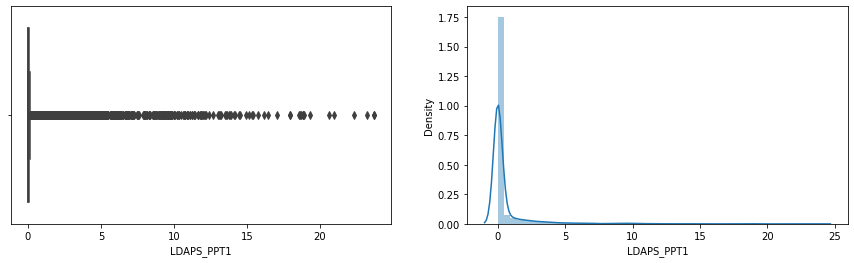

In [30]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_PPT1'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_PPT1'])

From the above observation we can see that there are outliers present in the column and data is highly positively skewed

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

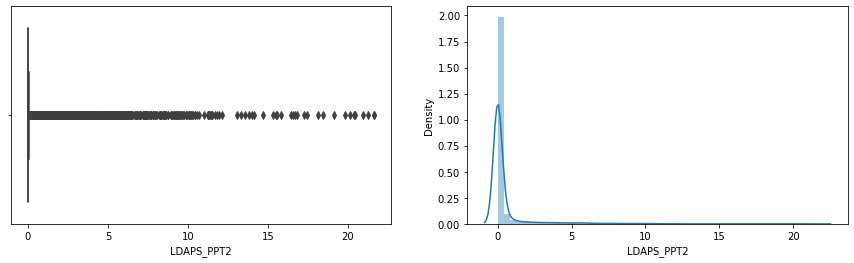

In [31]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_PPT2'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_PPT2'])

From the above observation we can see that there are outliers present in the column and data is highly positively skewed

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

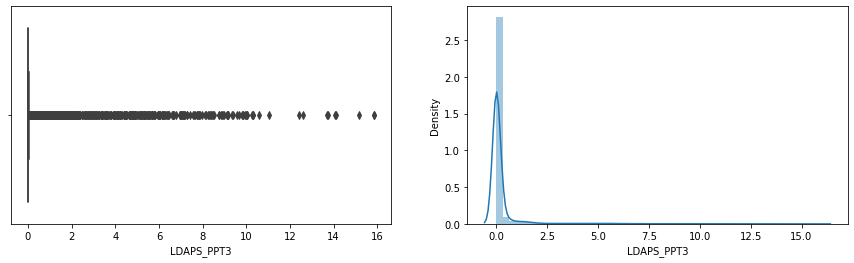

In [32]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_PPT3'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_PPT3'])

From the above observation we can see that there are outliers present in the column and data is highly positively skewed

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

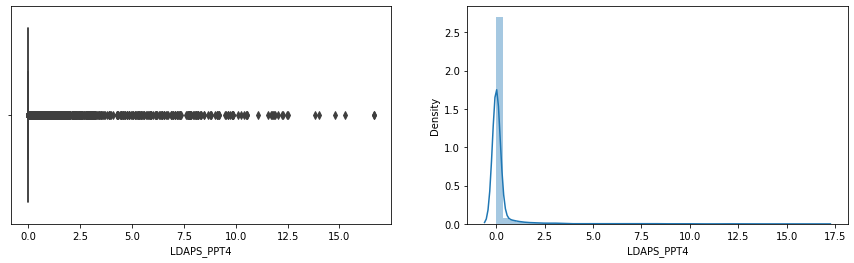

In [33]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['LDAPS_PPT4'])
plt.subplot(1,2,2)
sns.distplot(df['LDAPS_PPT4'])

From the above observation we can see that there are outliers present in the column and data is highly positively skewed

<AxesSubplot:xlabel='lat', ylabel='Density'>

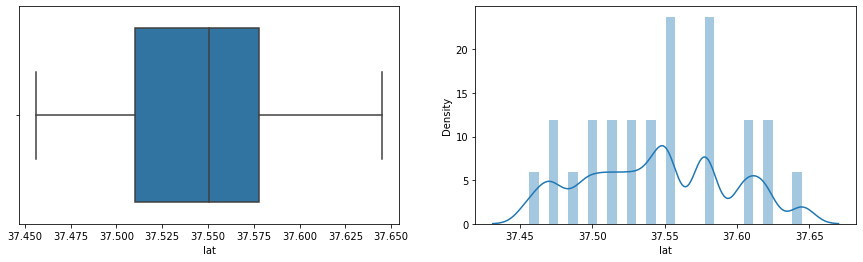

In [34]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['lat'])
plt.subplot(1,2,2)
sns.distplot(df['lat'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='lon', ylabel='Density'>

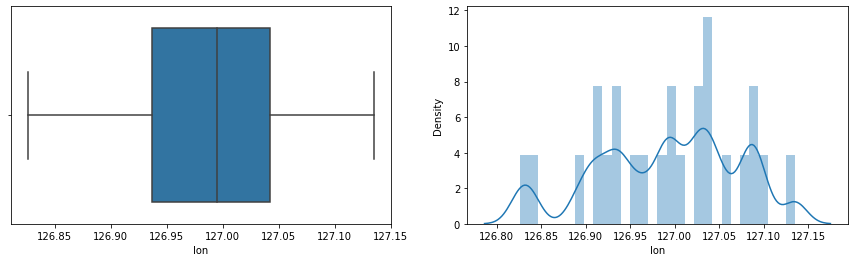

In [35]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['lon'])
plt.subplot(1,2,2)
sns.distplot(df['lon'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='DEM', ylabel='Density'>

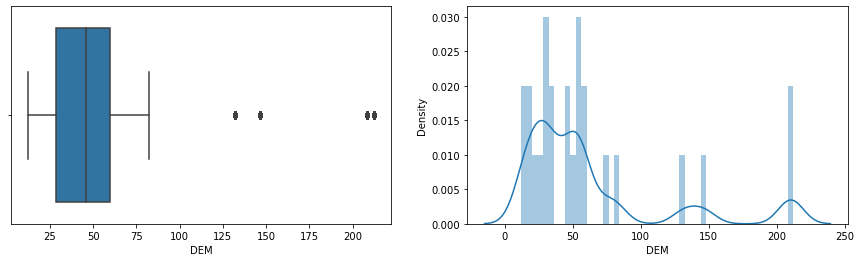

In [36]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['DEM'])
plt.subplot(1,2,2)
sns.distplot(df['DEM'])

From the above observation we can see that there are outliers present in the column and data is positively skewed

<AxesSubplot:xlabel='Slope', ylabel='Density'>

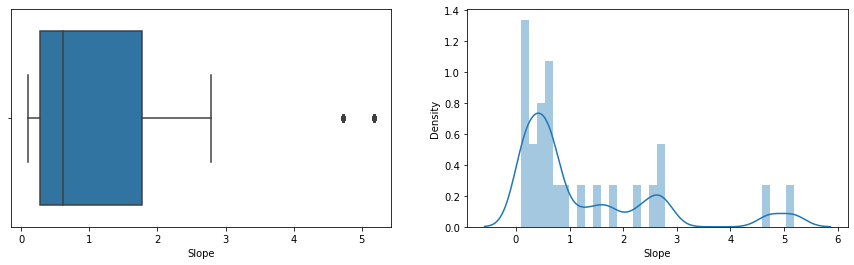

In [37]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Slope'])
plt.subplot(1,2,2)
sns.distplot(df['Slope'])

From the above observation we can see that there are outliers present in the column and data is positively skewed

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

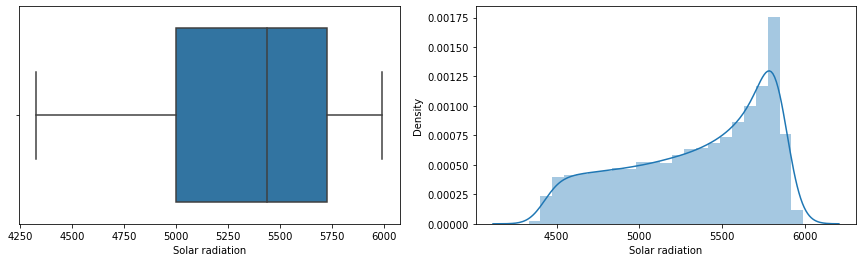

In [38]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Solar radiation'])
plt.subplot(1,2,2)
sns.distplot(df['Solar radiation'])

From the above observation we can see that there are no outlier present in the dataset and skewness is also okay 

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

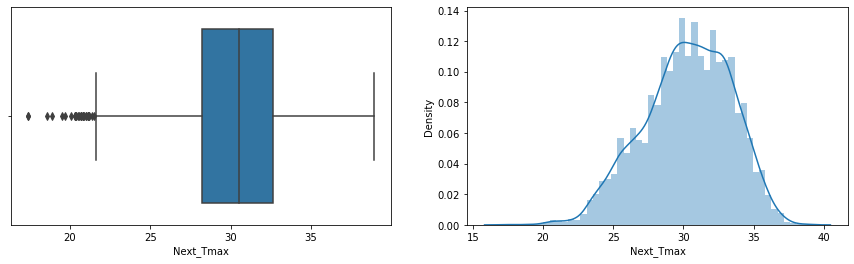

In [39]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Next_Tmax'])
plt.subplot(1,2,2)
sns.distplot(df['Next_Tmax'])

From the above observation we can see that there are outliers present in the column and data is negatively skewed

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

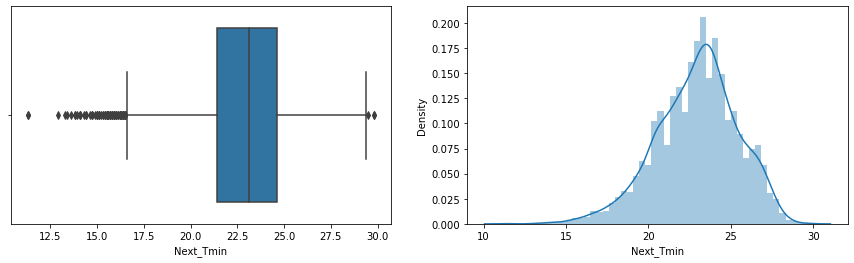

In [40]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Next_Tmin'])
plt.subplot(1,2,2)
sns.distplot(df['Next_Tmin'])

From the above observation we can see that there are outliers present in the column and data is negatively skewed

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

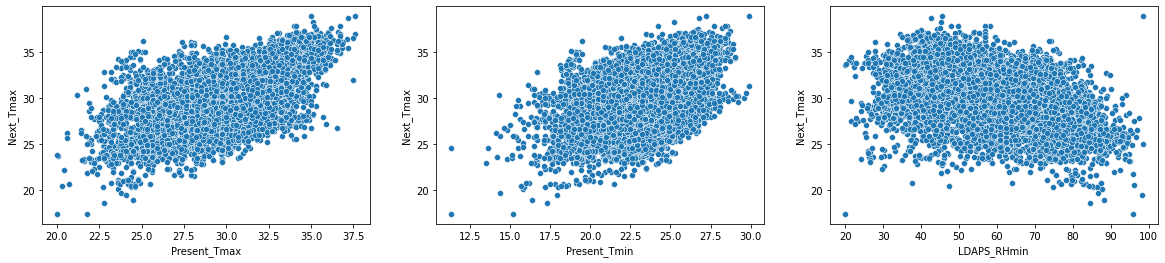

In [41]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'Present_Tmax', y = 'Next_Tmax')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Present_Tmin',y = 'Next_Tmax')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_RHmin',y = 'Next_Tmax')

From the above observation we can see that the Present Tmax and Present Tmin have positive corelation with Next_Tmax and min relative humidity not proportional to the target varriable

In [ ]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'Present_Tmax', y = 'Next_Tmin')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Present_Tmin',y = 'Next_Tmin')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_RHmin',y = 'Next_Tmin')

From the above observation we can see that the Present Tmax and Present Tmin have positive corelation with Next_Tmin and min relative humidity not proportional to the target varriable

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

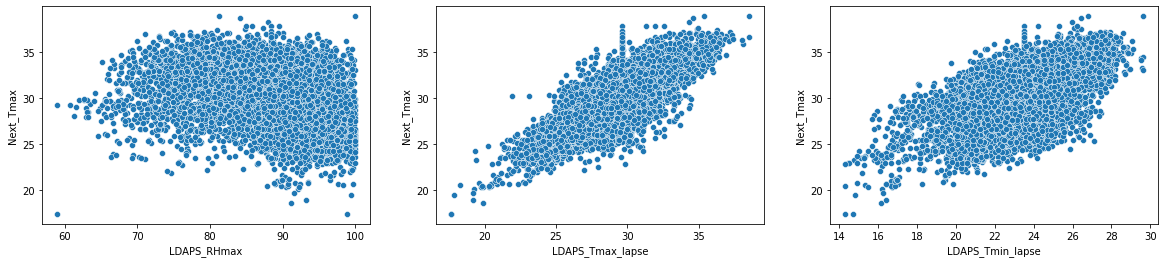

In [43]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_RHmax', y = 'Next_Tmax')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_Tmax_lapse',y = 'Next_Tmax')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_Tmin_lapse',y = 'Next_Tmax')

From the above observation we can see that the Tmax_lapse and Tmin_lapse have positive corelation with 1st target variable and max relative humidity not proportional to the target varriable

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

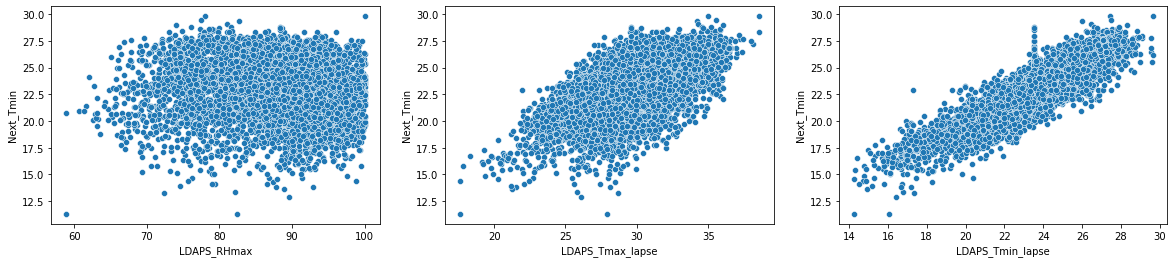

In [44]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_RHmax', y = 'Next_Tmin')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_Tmax_lapse',y = 'Next_Tmin')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_Tmin_lapse',y = 'Next_Tmin')

From the above observation we can see that the Tmax_lapse and Tmin_lapse have positive corelation with 2nd target variable and max relative humidity not proportional to the target variable.


<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

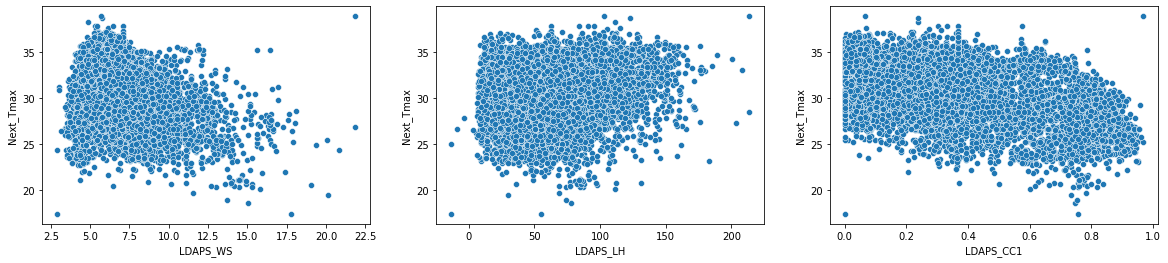

In [45]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_WS', y = 'Next_Tmax')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_LH',y = 'Next_Tmax')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_CC1',y = 'Next_Tmax')

From the above observation we can see that the wind speed, latent heat and 1st 6hr cloud cover does not have any positive corelation with the 1st target variable

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

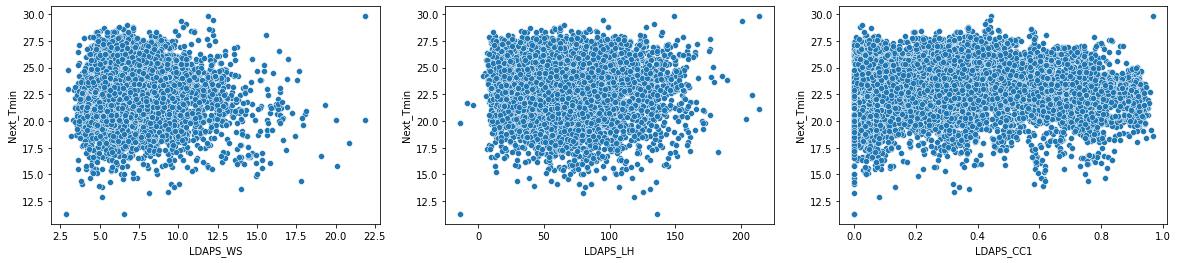

In [46]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_WS', y = 'Next_Tmin')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_LH',y = 'Next_Tmin')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_CC1',y = 'Next_Tmin')

From the above observation we can see that the wind speed, latent heat and 1st 6hr cloud cover does not have any positive corelation with the 2nd target variable

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

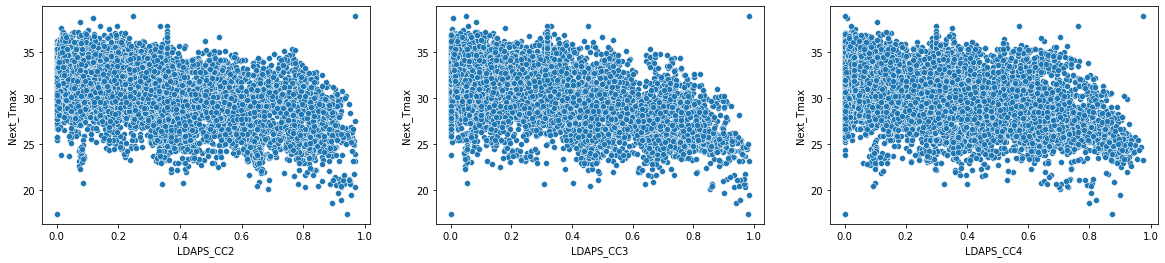

In [47]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_CC2', y = 'Next_Tmax')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_CC3',y = 'Next_Tmax')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_CC4',y = 'Next_Tmax')

From the above observation we can see that the 2nd 6hr cloud cover, 3rd 6hr cloud cover and 4th 6hr cloud cover does not have any positive corelation with the 1st target variable

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

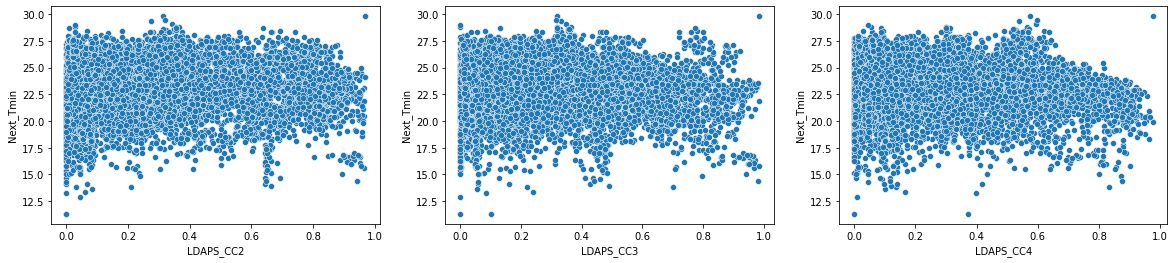

In [48]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_CC2', y = 'Next_Tmin')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_CC3',y = 'Next_Tmin')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_CC4',y = 'Next_Tmin')

From the above observation we can see that the 2nd 6hr cloud cover, 3rd 6hr cloud cover and 4th 6hr cloud cover does not have any positive corelation with the 2nd target variable

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmax'>

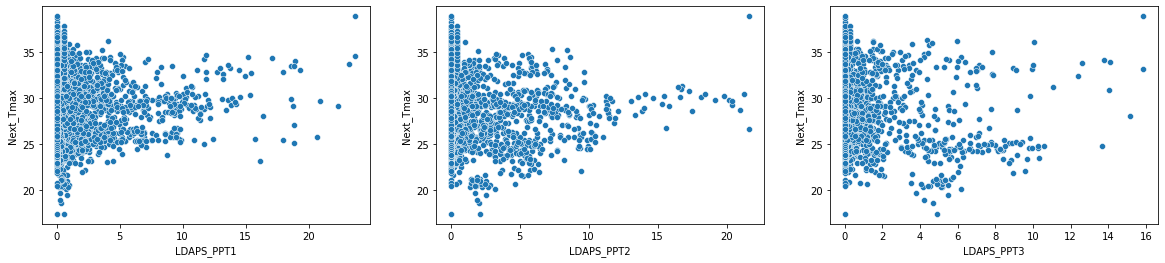

In [49]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_PPT1', y = 'Next_Tmax')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_PPT2',y = 'Next_Tmax')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_PPT3',y = 'Next_Tmax')

From the above observation we can see that the 1st 6-hour split average precipitation, 2nd 6-hour split average precipitation and 3rd 6-hour split average precipitation does not have any positive corelation with the 1st target variable

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Next_Tmin'>

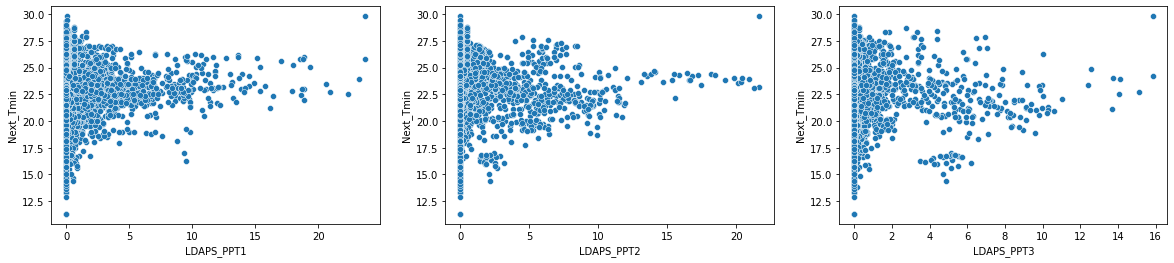

In [50]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_PPT1', y = 'Next_Tmin')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'LDAPS_PPT2',y = 'Next_Tmin')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'LDAPS_PPT3',y = 'Next_Tmin')

From the above observation we can see that the 1st 6-hour split average precipitation, 2nd 6-hour split average precipitation and 3rd 6-hour split average precipitation does not have any positive corelation with the 2nd target variable

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

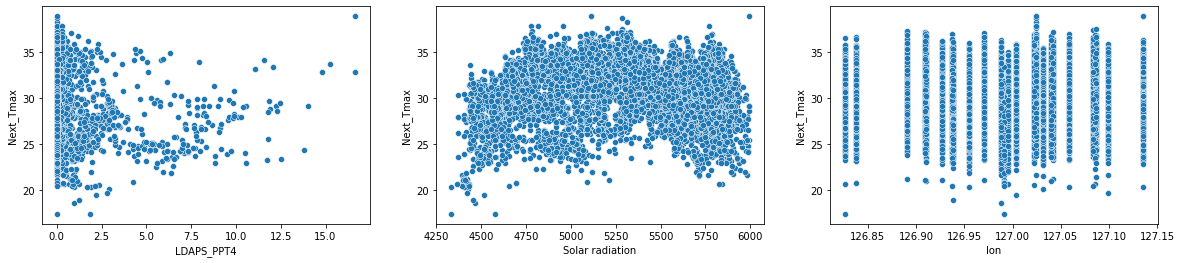

In [51]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_PPT4', y = 'Next_Tmax')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Solar radiation',y = 'Next_Tmax')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'lon',y = 'Next_Tmax')

From the above observation we can see that the 4th 6-hour split average precipitation, solar radiation and longitude does not have any positive corelation with the 1st target variable

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

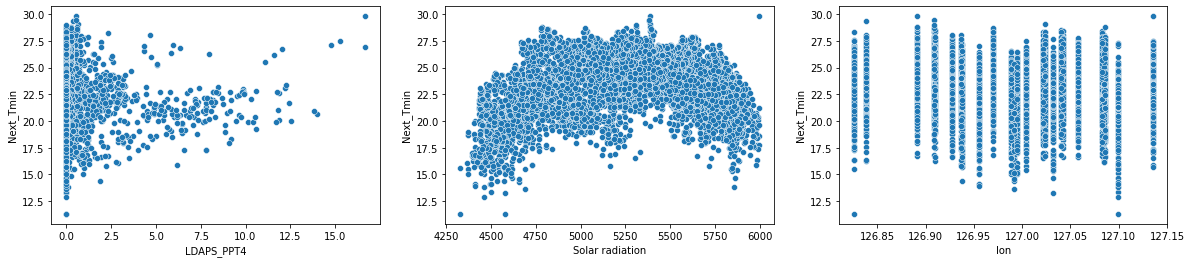

In [52]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.scatterplot(data = df,x= 'LDAPS_PPT4', y = 'Next_Tmin')
plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Solar radiation',y = 'Next_Tmin')
plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'lon',y = 'Next_Tmin')

From the above observation we can see that the 4th 6-hour split average precipitation, solar radiation and longitude does not have any positive corelation with the 2nd target variable

In [11]:
df_corr = df.corr().abs()
df_corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
station,1.000000e+00,0.112655,0.131646,0.066733,0.166984,0.069107,0.104758,0.005277,0.133357,0.006919,...,0.237502,0.118704,0.255830,0.090061,0.019001,0.107983,0.128293,4.511679e-18,9.810749e-18,0.000000
Present_Tmax,1.126554e-01,1.000000,0.618760,0.204571,0.301787,0.570129,0.623496,0.121820,0.135463,0.311805,...,0.052615,0.009020,0.187121,0.105809,0.025439,0.610348,0.622741,9.202962e-04,1.436869e-01,0.059904
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,0.015140,0.464151,0.762993,0.034675,0.009258,0.084447,...,0.078475,0.043461,0.250275,0.146339,0.053578,0.471806,0.796670,2.665871e-03,1.079335e-01,0.037785
LDAPS_RHmin,6.673316e-02,0.204571,0.123143,1.000000,0.579141,0.564580,0.089476,0.294361,0.070858,0.613818,...,0.087099,0.076237,0.102115,0.123744,0.244080,0.437898,0.095019,5.400410e-02,6.587437e-02,0.002104
LDAPS_RHmax,1.669845e-01,0.301787,0.015140,0.579141,1.000000,0.373404,0.114143,0.135333,0.238579,0.436652,...,0.195798,0.025667,0.177168,0.219599,0.149261,0.283738,0.071997,3.908025e-02,1.263956e-02,0.141341
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,0.564580,0.373404,1.000000,0.654021,0.311996,0.048010,0.438439,...,0.042093,0.090666,0.178895,0.162332,0.047971,0.827189,0.586868,2.130397e-02,1.601416e-01,0.016358
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,0.114143,0.654021,1.000000,0.130035,0.134761,0.010901,...,0.096257,0.026701,0.195455,0.185849,0.159975,0.586983,0.880176,2.699957e-02,1.777279e-01,0.004447
LDAPS_WS,5.277000e-03,0.121820,0.034675,0.294361,0.135333,0.311996,0.130035,1.000000,0.006711,0.289445,...,0.036657,0.059466,0.191053,0.171629,0.121759,0.342729,0.096576,8.290952e-02,2.984156e-02,0.112214
LDAPS_LH,1.333566e-01,0.135463,0.009258,0.070858,0.238579,0.048010,0.134761,0.006711,1.000000,0.147296,...,0.133221,0.025822,0.055133,0.086781,0.047384,0.157616,0.055440,2.350649e-02,1.241973e-02,0.056656
LDAPS_CC1,6.918787e-03,0.311805,0.084447,0.613818,0.436652,0.438439,0.010901,0.289445,0.147296,1.000000,...,0.008131,0.006843,0.014090,0.020752,0.218309,0.452541,0.011028,7.650739e-02,2.026283e-02,0.066621


Corelation with the each other 

<AxesSubplot:>

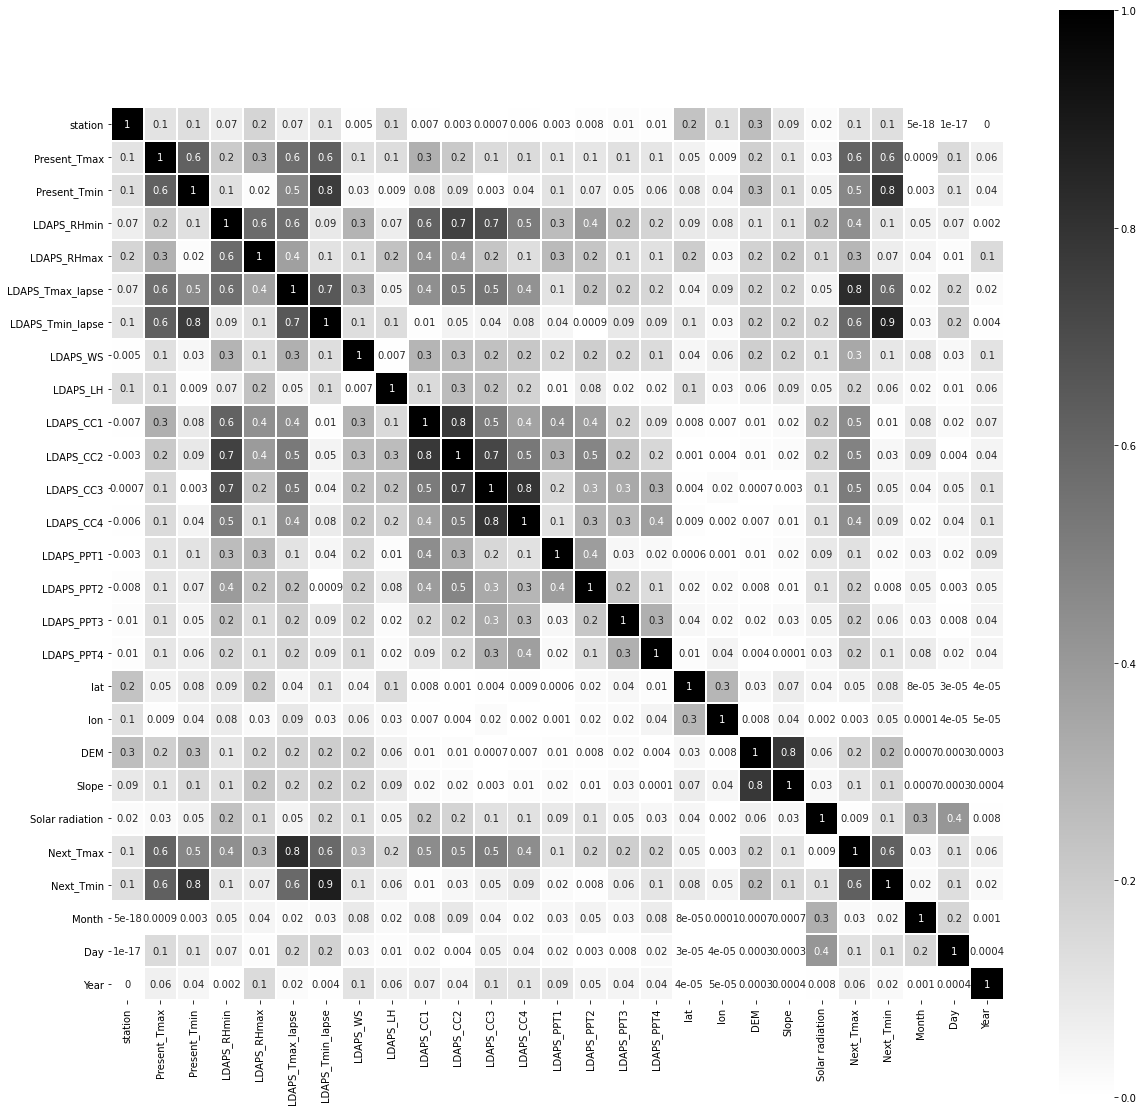

In [12]:
#Plotting Heatmap to check the corelation 
plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot = True, square = True,
           fmt = '.1g', linewidth = 1, cmap = 'binary')

From the above observation we can say that all Time_lapse, present_tmax ,Present_Tmin and 6 hour split average precipitation have good corelation

In [13]:
#Columns with the outliers 
outcol = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH',
             'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']]
#Removing outliers present in the above columns
z = np.abs(zscore(outcol))
new_df = df[(z<3).all(axis = 1)]

Outliers removed

In [14]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (7752, 27)
Shape After: (6907, 27)
Percentage Loss: 10.900412796697626


Removed the outliers by zscore method, In result we get 10.90% Data loss and that much data loss is not accetable 

In [15]:
#Removing outliers by IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

df_new = df[~((df < (Q1 - 1.5* IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]

Removed the outliers by IQR method 

In [16]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',df_new.shape)
print('Percentage Loss :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (7752, 27)
Shape After: (2447, 27)
Percentage Loss : 68.43395252837978


Removed the outliers by IQR method , In result we get 68% data loss and that is huge, We cant proceed further with this data, We proceed further with outliers present data

In [17]:
x = df.drop(['Next_Tmax','Next_Tmin'],axis = 1)
y1 = df['Next_Tmax']
y2 = df['Next_Tmin']

Seprating the features and Target variables (We have 2 target variables in this dataset)

In [18]:
x.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Month              -0.706382
Day                 0.245892
Year                0.000365
dtype: float64

As we can see due to the outliers most of the columns have skewness 

In [19]:
#Removing outliers with the power_transform method
df_sk = power_transform(x)

df_sk = pd.DataFrame(df_sk,columns = x.columns)

In [20]:
df_sk.skew()

station            -0.204565
Present_Tmax       -0.035006
Present_Tmin       -0.012048
LDAPS_RHmin        -0.017469
LDAPS_RHmax        -0.115143
LDAPS_Tmax_lapse   -0.009351
LDAPS_Tmin_lapse   -0.017827
LDAPS_WS            0.002408
LDAPS_LH            0.057403
LDAPS_CC1           0.046757
LDAPS_CC2           0.045326
LDAPS_CC3           0.087933
LDAPS_CC4           0.126895
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.000000
lon                -0.198429
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.042946
Day                -0.041587
Year               -0.000108
dtype: float64

Skewness removed by power_transform method

In [21]:
x= df_sk

In [22]:
#Scaling the data
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [23]:
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y1,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.7749945001835342 on Random State 160


We get best random state 160

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y1,test_size = 0.25,random_state = maxRS)

R2_Score of Linear regression: 0.7749945001835342
MAE: 1.1648988711944153
MSE: 2.3460716105557164
RMSE: 1.5316891363967156


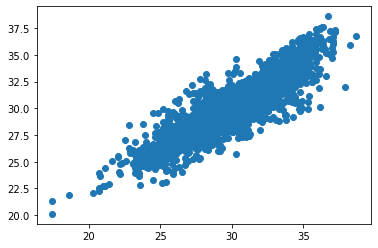

In [25]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

By applying linear regression we get 0.77 r_2 score and 1.5 RMSE 

R2_score of Random Forest: 0.911919923124151
MAE: 0.7115041136059261
MSE: 0.9183871860134515
RMSE: 0.9583251984652451


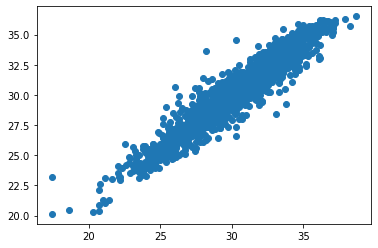

In [26]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

By applying RandomForestRegressor we get 0.91 r_2 score and 0.95 RMSE 

R2_score of KNN : 0.89427734796768
MAE: 0.774341719518671
MSE: 1.1023415548864541
RMSE: 1.0499245472349212


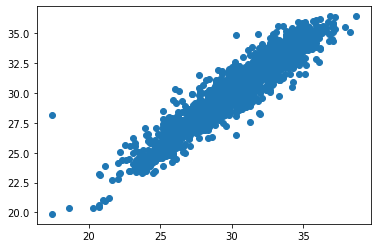

In [104]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

By applying KNeighborsRegressor we get 0.89 r_2 score and 1.04 RMSE 

R2_score of SVR : 0.8968959790058902
MAE: 0.7447413018500214
MSE: 1.0750377959015567
RMSE: 1.0368402943084132


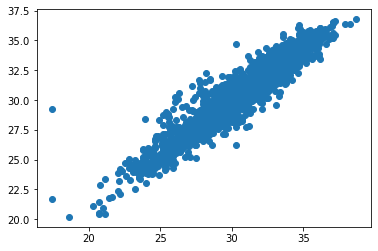

In [105]:
#Applying SVR
SVR = SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
plt.scatter(x=y_test,y=predsvr)

By applying SVR we get 0.89 r_2 score and 1.03 RMSE 

R2_score of DT: 0.7946079799838427
MAE: 1.0520378330177242
MSE: 2.141567150970305
RMSE: 1.4634094269787608


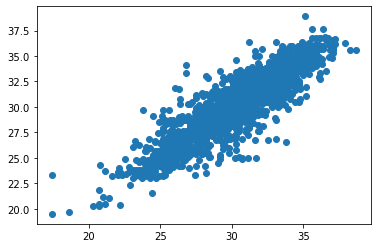

In [106]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

By applying DecisionTreeRegressor we get 0.79 r_2 score and 1.46 RMSE 

As we see above r2_scores and RMSE, We get best r2_score 0.91 and less RMSE 0.96 from RandomForestRegressor. So we use RandomForestRegressor for GridsearchCV

In [27]:
#Using GtridSearchCV to RandomForestRegressor
parameters ={'n_estimators':[30,40,50,70],
             'criterion':['mse','mae'],
                 'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,5]}

In [28]:
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 70}

We get best parameters for RandomForestRegressor.

r2_score of the final model is 92.12627580984679
MAE: 0.674762488269026
MSE: 0.8209719676599851
RMSE: 0.9060750342328086


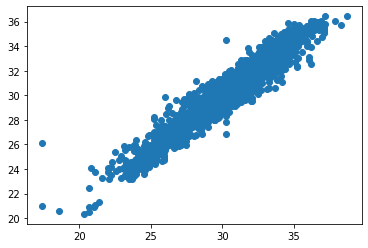

In [30]:
finalmod = RandomForestRegressor(criterion = 'mse',max_features = 'sqrt',min_samples_split = 2,n_estimators = 70)
finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('r2_score of the final model is',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test,y=pred)

By putting the best params to the RandomForestRegressor we get 92.12 r_2 score and 0.90 RMSE

# Algorithms for 2nd Target Variable

In [120]:
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y2,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.8380266494735937 on Random State 160


We get 0.83 r_2 score and 160 best random state value

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y2,test_size = 0.25,random_state = maxRS)

R2_Score of Linear regression: 0.8296473152643054
MAE: 0.7904688240349327
MSE: 1.01757326936852
RMSE: 1.0087483677154179


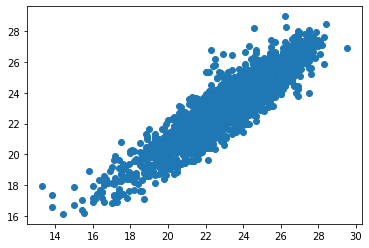

In [121]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

By applying LinearRegression we get 0.83 r_2 score and 1.02 RMSE

R2_score of Random Forest: 0.9102034569307598
MAE: 0.5574303141730204
MSE: 0.5363846308071235
RMSE: 0.732382844424365


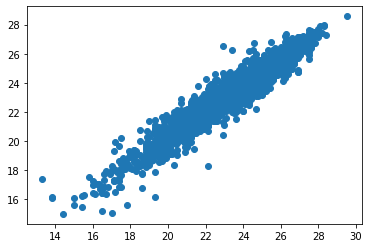

In [122]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

By applying RandomForestRegressor we get 0.91 r_2 score and 0.73 RMSE

R2_score of KNN : 0.8835226850982243
MAE: 0.6561214343683309
MSE: 0.7527155378212516
RMSE: 0.8675918036849193


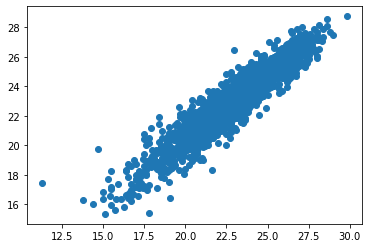

In [114]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

By applying KNeighborsRegressor we get 0.88 r_2 score and 0.86 RMSE

R2_score of SVR : 0.9075887030619433
MAE: 0.5599543418874326
MSE: 0.5971928450973274
RMSE: 0.7727825341564905


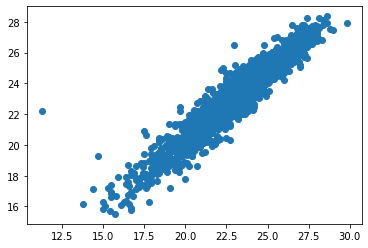

In [116]:
#Applying SVR
from sklearn import svm
SVR = svm.SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
plt.scatter(x=y_test,y=predsvr)

By applying SVR we get 0.90 r_2 score and 0.77 RMSE

R2_score of DT: 0.8093014177344029
MAE: 0.8138504847689374
MSE: 1.2323583011236714
RMSE: 1.1101163457600611


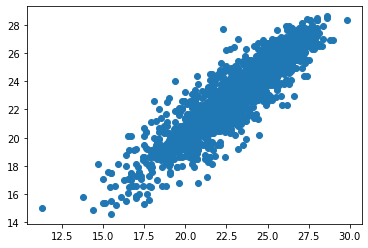

In [117]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

By applying KNeighborsRegressor we get 0.80 r_2 score and 1.11 RMSE

As we see above r2_scores and RMSE, We get best r2_score 0.90 and less RMSE 0.76 from RandomForestRegressor. So we use RandomForestRegressor for GridsearchCV

In [123]:
#Using GtridSearchCV to RandomForestRegressor
parameters ={'n_estimators':[30,40,50,70],
             'criterion':['mse','mae'],
                 'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,5]}

In [124]:
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 70}

We get best parameters for RandomForestRegressor.

In [132]:
finalmod2 = RandomForestRegressor(criterion = 'mse',max_features = 'sqrt',min_samples_split = 2,n_estimators = 70)
finalmod2.fit(x_train,y_train)
pred = finalmod2.predict(x_test)
print('r2_score of the final model is',r2_score(y_test,pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


r2_score of the final model is 91.85138184049805
MAE: 0.533084977530443
MSE: 0.486744076517784
RMSE: 0.6976704641288637


By putting the best params into the model we get 91.85 r_2 score and 0.69 RMSE

In [133]:
#Saving Final Model
import joblib
joblib.dump(finalmod2,'Temp Forecast Next T_min.pkl')

['Temp Forecast Next T_min.pkl']

In [31]:
#Saving Final Model
import joblib
joblib.dump(finalmod,'Temp Forecast Next T_max.pkl')

['Temp Forecast Next T_max.pkl']